<h2 style="color:orange">Starting with the greatest name of Almighty Allah.</h2>

<h1 style="color:red; text-align:center ">" Heart Disease Prediction "</h1>

<h2 style="color:blue">Import Libraries</h2>

In [285]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings

<h2 style="color:blue">Exploratory data analysis</h2>

####  Load Sample Data

In [286]:
# loading the csv data to a Pandas DataFrame

heart_data = pd.read_csv('./k-heart-disease-ds.csv')

#### Attributes in Sample Data

In [287]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#### Rows and Columns in Dataset

In [288]:
heart_data.shape

(1025, 14)

#### Head of Dataset

In [289]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### Tail of Dataset

In [290]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


#### Information of Dataset

In [291]:
# getting some info about the data

heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### Missing values checking

In [292]:
# checking for missing values

heart_data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [293]:
# checking for Number of missing values

heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Statistical measures 

In [294]:
# statistical measures about the data

heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### To check Categorical & Numerical Columns

Initialy, I thought there are only numerical value, but some columns are have relatively few unique value like a categorical value.


In [295]:
categorical_val = []
numerical_val = []
for column in heart_data.columns:
    print('******************************************************************')
    print(f"{column} : {heart_data[column].unique()}")
    if len(heart_data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        numerical_val.append(column)

******************************************************************
age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
******************************************************************
sex : [1 0]
******************************************************************
cp : [0 1 2 3]
******************************************************************
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
******************************************************************
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 

In [296]:
# This will show the categorical and numerical columns in data

print(f'Categorical columns: {categorical_val}')
print(f'Numerical columns: {numerical_val}')

Categorical columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Numerical columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


#### Checking Target Value

In [297]:
# checking the distribution of Target Value

heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [298]:
#  For Graphical Representaion of Categorical Columns


# plt.figure(figsize=(15, 15))
# for i, column in enumerate(categorical_val, 1):
#     plt.subplot(3, 3, i)
#     heart_data[heart_data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
#     heart_data[heart_data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
#     plt.legend()
#     plt.xlabel(column)

<AxesSubplot:>

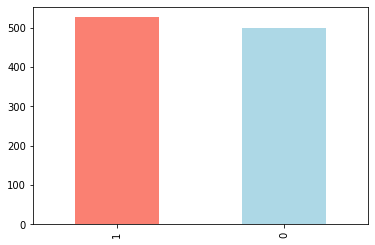

In [299]:
heart_data.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

This Each class is evenly distributed.

##### ==> 1 means (positive) Defective Heart 
##### ==> 0 means (negative) Healthy Heart

<h2 style="color:blue">Data Pre-Processing</h2>

#### Label Encoding of Sample Data 

* Input and Output is converted into Numeric Representation
* Sample data is already encoded
* No need of transformation

#### Splitting the Features and Target

In [300]:
# Features 

X = heart_data.iloc[:, 1:13]


##### Features Data Head

In [301]:
X.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,0,125,212,0,1,168,0,1.0,2,2,3
1,1,0,140,203,1,0,155,1,3.1,0,0,3
2,1,0,145,174,0,1,125,1,2.6,0,0,3
3,1,0,148,203,0,1,161,0,0.0,2,1,3
4,0,0,138,294,1,1,106,0,1.9,1,3,2


In [302]:
X = X.values
X

array([[  1.,   0., 125., ...,   2.,   2.,   3.],
       [  1.,   0., 140., ...,   0.,   0.,   3.],
       [  1.,   0., 145., ...,   0.,   0.,   3.],
       ...,
       [  1.,   0., 110., ...,   1.,   1.,   2.],
       [  0.,   0., 110., ...,   2.,   0.,   2.],
       [  1.,   0., 120., ...,   1.,   1.,   3.]])

In [303]:
# Lables

Y = heart_data['target']


##### Target Data Head

In [304]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [305]:
Y = Y.values
Y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### Splitting the Data into Training data & Test Data

In [306]:
# Split arrays or matrices into random train and test subsets.
# Ration 80% - 20%

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)

# random_state
# Controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls.

print(X.shape, X_train.shape, X_test.shape)

(1025, 12) (820, 12) (205, 12)


<h3 style="color:blue">Model Training</h3>


### 1. KNN

In [307]:
# Classifier implementing the k-nearest neighbors vote.

KNN_clf = KNeighborsClassifier(n_neighbors=3)

# Number of neighbors to use by default = 5 for kneighbors queries.
# Fit the k-nearest neighbors classifier from the training dataset.

KNN_clf.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=3)

#### Save the Trained Model

In [308]:
pickle.dump(KNN_clf, open('knn_trained_model.pkl', 'wb'))

#### Load the Trained Model

In [309]:
KNN_model = pickle.load(open('knn_trained_model.pkl', 'rb'))

#### Predict the Lables

In [310]:
# Predict the class labels for the provided data.

Y_pred_knn = KNN_model.predict(X_test)

# Display the Predicted lables

Y_pred_knn

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [311]:
# Display the Actual Lables of Data

Y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0], dtype=int64)


<h3 style="color:blue">Model Testing</h3>

#### Accuracy

In [312]:
# accuracy on test data

test_data_accuracy1 = accuracy_score(Y_pred_knn, Y_test)
print('Accuracy on Test data : ', round(test_data_accuracy1,2))

Accuracy on Test data :  0.95


#### KNN Classification REPORT

In [313]:
# Display the Classification Report of KNN

print("\n-------------> KNN Classification REPORT <-------------\n")
print(classification_report(Y_test, Y_pred_knn))



-------------> KNN Classification REPORT <-------------

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       100
           1       1.00      0.90      0.95       105

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.95      0.95       205



### 2. SVM

In [314]:
# Support Vector Classification.

svm_clf = SVC(kernel='linear')

# F1t the Support Vector classifier from the training dataset.

svm_clf.fit(X_train, Y_train)

SVC(kernel='linear')

#### Save the Trained Model

In [315]:
pickle.dump(svm_clf, open('svc_trained_model.pkl', 'wb'))

#### Load the Trained Model

In [316]:
svc_model = pickle.load(open('svc_trained_model.pkl', 'rb'))

#### Predict the Lables

In [317]:
# Predict the class labels for the provided data.

Y_pred_svm = svc_model.predict(X_test)

# Display the Predicted lables

Y_pred_svm

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [318]:
# Display the Actual Lables of Data

Y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0], dtype=int64)


<h3 style="color:blue">Model Testing</h3>

#### Accuracy

In [319]:
# accuracy on test data

test_data_accuracy2 = accuracy_score(Y_pred_svm, Y_test)
print('Accuracy on Test data : ', round(test_data_accuracy2,2))

Accuracy on Test data :  0.84


#### SVC Classification REPORT

In [320]:
# Display the Classification Report of SVM

print("\n----------------> SVM Classification REPORT <-------------\n")
print(classification_report(Y_test, Y_pred_svm))


----------------> SVM Classification REPORT <-------------

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       100
           1       0.82      0.89      0.85       105

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



### 3. Decision Tree 


In [321]:
# Decision Tree Classification.

D_Tree_clf = DecisionTreeClassifier(criterion='entropy' ,random_state=0)

# DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.
# Fit the Decision Tree classifier from the training dataset.

D_Tree_clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

#### Save the Trained Model

In [322]:
pickle.dump(D_Tree_clf, open('dt_trained_model.pkl', 'wb'))

#### Load the Trained Model

In [323]:
DT_model = pickle.load(open('dt_trained_model.pkl', 'rb'))

#### Predict the Lables

In [324]:
# Predict the class labels for the provided data.

Y_pred_dt = DT_model.predict(X_test)

# Display the Predicted lables

Y_pred_dt


array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [325]:
# Display the Actual Lables of Data

Y_test


array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0], dtype=int64)


<h3 style="color:blue">Model Testing</h3>

#### Accuracy

In [326]:
# accuracy on test data

test_data_accuracy3 = accuracy_score(Y_pred_dt, Y_test)
print('Accuracy on Test data : ', round(test_data_accuracy3,2))

Accuracy on Test data :  0.99


#### Decision Tree Classification REPORT

In [327]:
# Display the Classification Report of Decision #### SVC Classification REPORTTree

print("\n-------------> Decision Tree Classification REPORT <-------------\n")
print(classification_report(Y_test, Y_pred_dt))


-------------> Decision Tree Classification REPORT <-------------

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### 4. Categorical Naive Bayes 

In [328]:
# Naive Bayes classifier for categorical features.

cnb = CategoricalNB()

# The categorical Naive Bayes classifier is suitable for classification 
# with discrete features that are categorically distributed. 
#The categories of each feature are drawn from a categorical distribution.

# Fit the Naive Bayes classifier from the training dataset.

cnb.fit(X_train, Y_train)


CategoricalNB()

#### Save the Trained Model

In [329]:
pickle.dump(gnb, open('cnb_trained_model.pkl', 'wb'))

#### Load the Trained Model

In [330]:
gnb_model = pickle.load(open('cnb_trained_model.pkl', 'rb'))

#### Predict the Lables

In [331]:
# Predict the class labels for the provided data.

Y_pred_cnb = gnb_model.predict(X_test)

# Display the Predicted lables

Y_pred_cnb

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [332]:
# Display the Actual Lables of Data

Y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0], dtype=int64)


<h3 style="color:blue">Model Testing</h3>

#### Accuracy

In [333]:
# accuracy on test data

test_data_accuracy4 = accuracy_score(Y_pred_cnb, Y_test)
print('Accuracy on Test data : ', round(test_data_accuracy4,2))

Accuracy on Test data :  0.91


#### Naive Bayes Classification REPORT

In [334]:
# Display the Classification Report of Naive Bayes

print("\n-------------> CNB Classification REPORT <-------------\n")
print(classification_report(Y_test, Y_pred_cnb))



-------------> CNB Classification REPORT <-------------

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       100
           1       0.90      0.92      0.91       105

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



### 5. Logistic Regression

In [335]:
# Logistic Regression Classification.

lr_clf = LogisticRegression(random_state=0)

# Fit the model according to the given training data.

lr_clf.fit(X_train, Y_train)

# To Remove Warnings

warnings.filterwarnings('ignore')

#### Save the Trained Model

In [336]:
pickle.dump(lr_clf, open('lr_trained_model.pkl', 'wb'))

#### Load the Trained Model

In [337]:
LR_model = pickle.load(open('lr_trained_model.pkl', 'rb'))

#### Predict the Lables

In [338]:
# Predict the class labels for the provided data.

Y_pred_lr = LR_model.predict(X_test)

# Display the Predicted lables

Y_pred_lr

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [339]:
# Display the Actual Lables of Data

Y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0], dtype=int64)

<h3 style="color:blue">Model Testing</h3>

#### Accuracy

In [340]:
# accuracy on test data

test_data_accuracy5 = accuracy_score(Y_pred_lr, Y_test)
print('Accuracy on Test data : ', round(test_data_accuracy5,2))

Accuracy on Test data :  0.83


#### Logistic Regression Classification REPORT

In [341]:
# Display the Classification Report of NB

print("\n--------> Logistic Regression Classification REPORT <--------\n")
print(classification_report(Y_test, Y_pred_lr))



--------> Logistic Regression Classification REPORT <--------

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       100
           1       0.82      0.86      0.84       105

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



<h3 style="color:blue">Comparing Model's Accuracy</h3>

In [342]:
print("KNN Accuracy = ", round(test_data_accuracy1,2)*100, "%")
print("SVC Accuracy = ", round(test_data_accuracy2,2)*100, "%")
print("DT Accuracy = ", round(test_data_accuracy3,2)*100, "%")
print("CNB Accuracy = ", round(test_data_accuracy4,2)*100, "%")
print("LR Accuracy = ", round(test_data_accuracy5,2)*100, "%")


KNN Accuracy =  95.0 %
SVC Accuracy =  84.0 %
DT Accuracy =  99.0 %
CNB Accuracy =  91.0 %
LR Accuracy =  83.0 %


<h2 style="color:red; text-align: right "> Jazakallah Khair </h2>

<h6 style="text-align: center ">Copyrights © 2022 All Rights Reserved | Muhammad-Awais-Ramzan</h6>